In [1]:
import domainbed.datasets
import domainbed.networks
from domainbed import algorithms
from domainbed.lib.WideResNet_pytorch.wideresnet import WideResNet
from torchvision import transforms
import torch.nn as nn
import torch
import numpy as np
from tqdm import tqdm
from torchvision import datasets

/media/SSD2/kavindya/Model/TFS-ViT_Token-level_Feature_Stylization/domainbed/visiontransformer.py:962: UserWarning: Overwriting vit_small_patch16_224 in registry with domainbed.visiontransformer.vit_small_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_small_patch16_224(pretrained=False, **kwargs):
/media/SSD2/kavindya/Model/TFS-ViT_Token-level_Feature_Stylization/domainbed/visiontransformer.py:975: UserWarning: Overwriting vit_base_patch16_224 in registry with domainbed.visiontransformer.vit_base_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_base_patch16_224(pretrained=False, **kwargs):
/media/SSD2/kavindya/Model/TFS-ViT_Token-level_Feature_Stylization/domainbed/visiontransformer.py:987: UserWarning: Overwriting vit_base_patch16_384 in registry with domainbed.visiontransformer.vit_base_patch16_384. This is bec

In [2]:
hparams = {"normalization":True, "mean_std":[]}
dataset = vars(domainbed.datasets)["CIFAR10"]("/media/SSD2/Dataset",[1], hparams)

Training dataset completed
Validation dataset completed


In [22]:
len(dataset[0].data)

50000

In [3]:
dataset[0].data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
hparams = {"normalization":True, "mean_std":[], 'data_augmentation':False, 'backbone':"ViTBase"}
dataset = vars(domainbed.datasets)["PACS"]("/media/SSD2/Dataset",[1,2,3], hparams)

[INFO] NOT Doing Special Data Augmentation for Training
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation


In [9]:
len(dataset[0].samples)

1670

In [10]:
dataset[0].samples[0]

('/media/SSD2/Dataset/PACS/Unsplit_data/AAP/dog/056_0001.jpg', 0)

In [10]:
dataset[0].transform

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomCrop(size=(32, 32), padding=4)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)

In [10]:
type(dataset[0])

torchvision.datasets.cifar.CIFAR10

In [11]:
default_transforms = dataset[0].transforms

In [11]:
test_transform = transforms.Compose(
                [transforms.ToTensor(),
                transforms.Normalize([0.5] * 3, [0.5] * 3)])

dataset[0].transform = test_transform

In [12]:
dataset[0].transform

Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)

In [14]:
dataset[0].transforms = default_transforms

In [17]:
dataset[0].transforms

StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [8]:
hparams["digits"] = False
hparams['resnet18'] = True
hparams['empty_fc'] = True
hparams['resnet_dropout'] =0.0
network = domainbed.networks.Featurizer(input_shape=(3, 224, 224),hparams=hparams)
classifier = domainbed.networks.Classifier(in_features=network.n_outputs,out_features=10)
all = nn.Sequential(network, classifier)

/home/kavindya/anaconda3/envs/ViT_DGbed_2/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kavindya/anaconda3/envs/ViT_DGbed_2/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [71]:
children_counter = 0
for n,c in all.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n,)
    children_counter+=1

Children Counter:  0  Layer Name:  0
Children Counter:  1  Layer Name:  1


In [72]:
a = list(all.children())
a[:-1],a[-1:]

([ResNet(
    (network): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, mom

In [73]:
children_counter = 0
embeddings = nn.Sequential(*list(all.children())[-1:])
for n,c in embeddings.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",c,)
    children_counter+=1

Children Counter:  0  Layer Name:  Linear(in_features=512, out_features=10, bias=True)


In [74]:
children_counter = 0
embeddings = nn.Sequential(*list(all.children())[:-1])
for n,c in embeddings.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",c,)
    children_counter+=1

Children Counter:  0  Layer Name:  ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mo

In [56]:
hparams['resnet18'] = True
hparams['empty_fc'] = True
hparams['resnet_dropout'] =0.0
network2 = domainbed.networks.Featurizer(input_shape=(3, 224, 224),hparams=hparams)
classifier = domainbed.networks.Classifier(in_features=network2.n_outputs,out_features=10)
all = nn.Sequential(network2, classifier)

/home/kavindya/anaconda3/envs/ViT_DGbed_2/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kavindya/anaconda3/envs/ViT_DGbed_2/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
children_counter = 0
for n,c in network2.network.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n,)
    children_counter+=1

Children Counter:  0  Layer Name:  conv1
Children Counter:  1  Layer Name:  bn1
Children Counter:  2  Layer Name:  relu
Children Counter:  3  Layer Name:  maxpool
Children Counter:  4  Layer Name:  layer1
Children Counter:  5  Layer Name:  layer2
Children Counter:  6  Layer Name:  layer3
Children Counter:  7  Layer Name:  layer4
Children Counter:  8  Layer Name:  avgpool
Children Counter:  9  Layer Name:  fc


In [54]:
children_counter = 0
all = domainbed.networks.Featurizer(input_shape=(3, 224, 224),hparams=hparams)
embeddings = nn.Sequential(*list(all.network.children())[:-1])
for n,c in embeddings.named_children():
    print("Children Counter: ",children_counter," Layer Name: ",n,)
    children_counter+=1

Children Counter:  0  Layer Name:  0
Children Counter:  1  Layer Name:  1
Children Counter:  2  Layer Name:  2
Children Counter:  3  Layer Name:  3
Children Counter:  4  Layer Name:  4
Children Counter:  5  Layer Name:  5
Children Counter:  6  Layer Name:  6
Children Counter:  7  Layer Name:  7
Children Counter:  8  Layer Name:  8


In [8]:
train_loader = torch.utils.data.DataLoader(
            dataset[0],
            batch_size=64,
            shuffle=False,
            num_workers=4,
            pin_memory=True)

In [9]:
dataset[0].transform

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomCrop(size=(32, 32), padding=4)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)

In [9]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [10]:
from domainbed import algorithms

In [15]:
import domainbed.datasets
import domainbed.networks
from domainbed import algorithms
from domainbed.lib.WideResNet_pytorch.wideresnet import WideResNet
from torchvision import transforms
import torch.nn as nn
import torch

hparams = {"normalization":True, "mean_std":[]}
#dataset = vars(domainbed.datasets)["CIFAR10"]("/media/SSD2/Dataset",[1], hparams)


test_transform = transforms.Compose(
                [transforms.ToTensor(),
                transforms.Normalize([0.5] * 3, [0.5] * 3)])

dataset[0].transform = test_transform

train_loader = torch.utils.data.DataLoader(
            dataset[0],
            batch_size=64,
            shuffle=False,
            num_workers=4,
            pin_memory=True)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

hparams['loops_adv']=10
hparams['eta']=1.0
hparams['gamma']=1.0
hparams['resnet18'] = True
hparams['empty_fc'] = True
hparams['resnet_dropout'] =0.0
hparams['fixed_featurizer']=False
hparams['scheduler']=False
hparams['nonlinear_classifier']=False
hparams["lr"]=0.1
hparams["lr_max"]=20
hparams['weight_decay']=0.0
hparams['nesterov']=False
hparams['digits']=False
hparams['unfreeze_train_bn']=False

dataset = PACS_Custom("/media/SSD2/Dataset",[1,2,3], hparams)

algorithm_class = algorithms.get_algorithm_class("ME_ADA_CNN")
algorithm = algorithm_class(dataset.input_shape, dataset.num_classes,
                            len(dataset) - len([1]), hparams)
algorithm.to(device)


Training dataset completed
Validation dataset completed
Using Wide_ResNet
moving to the classifier
full_model_tuning_only


ME_ADA_CNN(
  (featurizer): WideResNet(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (block1): NetworkBlock(
      (layer): Sequential(
        (0): BasicBlock(
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (conv_shortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): BasicBlock(
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1)

In [12]:
print("\nMethods:")
for method in dir(algorithm):
    if not method.startswith("__") and callable(getattr(algorithm, method)):
        print(method)


Methods:
_apply
_call_impl
_get_backward_hooks
_get_backward_pre_hooks
_get_name
_load_from_state_dict
_maybe_warn_non_full_backward_hook
_named_members
_register_load_state_dict_pre_hook
_register_state_dict_hook
_replicate_for_data_parallel
_save_to_state_dict
_slow_forward
add_module
apply
bfloat16
buffers
children
classifier
cpu
cuda
dist_fn
double
entropy_loss
eval
extra_repr
extract_embeddings
featurizer
float
forward
get_buffer
get_extra_state
get_parameter
get_submodule
half
ipu
load_state_dict
maximize
modules
named_buffers
named_children
named_modules
named_parameters
network
parameters
predict
predict_with_embedding
printing
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_full_backward_hook
register_full_backward_pre_hook
register_load_state_dict_post_hook
register_module
register_parameter
register_state_dict_pre_hook
requires_grad_
set_extra_state
share_memory
state_dict
to
to_empty
train
type
update
xpu
zero_grad


In [12]:
class Denormalise(transforms.Normalize):
    """
    Undoes the normalization and returns the reconstructed images in the input domain.
    """

    def __init__(self, mean, std):
        mean = torch.as_tensor(mean)
        std = torch.as_tensor(std)
        std_inv = 1 / (std + 1e-12)
        mean_inv = -mean * std_inv
        super(Denormalise, self).__init__(mean=mean_inv, std=std_inv)

    def __call__(self, tensor):
        return super(Denormalise, self).__call__(tensor.clone())

In [13]:
class Clamp(object):
    """Clamp the pixel values of an image between a minimum and maximum value."""
    def __init__(self, min_val=0, max_val=1):
        self.min_val = min_val
        self.max_val = max_val
    
    def __call__(self, image):
        return torch.clamp(image, min=self.min_val, max=self.max_val)

In [18]:
images, labels = [], []
recover_transform = transforms.Compose([
                        Denormalise([0.5] * 3, [0.5] * 3),
                        Clamp(min_val=0, max_val=1)
                        
                        ])

image_denormalise = Denormalise([0.5] * 3, [0.5] * 3)
image_transform = transforms.ToPILImage()

algorithm.eval()
for images_train, labels_train in tqdm(train_loader):
    
    # wrap the inputs and labels in Variable
    images_train, labels_train = images_train.to(device), labels_train.to(device)
    inputs1, targets1 = algorithm.maximize(images_train, labels_train)
    images += [transforms.ToPILImage()(x) for x in torch.unbind(recover_transform(inputs1), dim=0)]
    labels += torch.unbind(targets1, dim=0)
    #inputs1=inputs1.detach().clone().cpu()
    # for j in range(len(inputs1)):
    #         input_max = image_denormalise(inputs1[j])
    #         input_max = image_transform(input_max.clamp(min=0.0, max=1.0))
    #         images1.append(input_max)
    #         labels.append(labels_train[j].item())
images1 = np.stack(images)
algorithm.train()  
print(len(images), len(labels))

100%|██████████| 782/782 [05:08<00:00,  2.53it/s]


50000 50000


In [41]:
type(images1[0])

numpy.ndarray

In [22]:
images = np.stack(images)

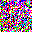

In [21]:
images[0]

In [24]:
train = dataset[0]

In [30]:
preprocess = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize([0.5] * 3, [0.5] * 3)])
train_transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        preprocess])

In [32]:
train_data = datasets.CIFAR10("/media/SSD2/Dataset/cifar", train=True, transform=train_transform, download=False)

In [33]:
type(train_data.data[0])

numpy.ndarray

In [43]:
train_data.data = np.concatenate([train_data.data,images])

In [28]:
type(train.data[0]), type(images[0])

(numpy.ndarray, PIL.Image.Image)

In [23]:
dataset2.data = np.concatenate([dataset2.data,images])
#train.targets = np.concatenate([train.targets,labels])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 227 and the array at index 1 has size 32

In [20]:
start_step, n_step = 0, 10
for step in range(start_step,n_step):
    if(step==5):
        print("#")
        n_step+=10
    print(step)

0
1
2
3
4
#
5
6
7
8
9


In [24]:
start_step, n_step = 0, 10
step = start_step
while(step+1!=n_step):
    if(step==5):
        print("#")
        n_step+=10
    step+=1
    print(step)


1
2
3
4
5
#
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [27]:
step, n_step = 0, 39100
step_per_epoch = 391
final_epoch = n_step/step_per_epoch
epoch = 0
k=0
while(step+1!=n_step):
    if(step%step_per_epoch==0):
        epoch+=1
        if (epoch+1%10==0) and (k<2):
            step_per_epoch+=391
    step+=1
print(epoch)

100


: 

In [16]:
import os
from PIL import Image
from torchvision import transforms
from .vision import VisionDataset

class PACSDataset(VisionDataset):
    def __init__(self, root, transform=None, target_transform=None):
        """Init PACS dataset."""
        super().__init__(root, transform=transform, target_transform=target_transform)

        self.root_dir = root
        self.transform = transform
        self.classes = os.listdir(root)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.data, self.targets = self.load_images()
        

    def load_images(self):
        images, targets = [],[]
        for cls in self.classes:
            class_dir = os.path.join(self.root_dir, cls)
            for image_name in os.listdir(class_dir):
                image = Image.open(os.path.join(class_dir, image_name)).convert('RGB')
                label = self.class_to_idx[cls]
                images.append(image)
                targets.append(label)
        return images, targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx], self.targets[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [17]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transforms as needed
])

# Create dataset and dataloader
dataset1 = PACSDataset(root_dir='/media/SSD2/Dataset/PACS/Unsplit_data/AAP/', transform=transform)

In [4]:
from torchvision.datasets import PACSDataset as pacs
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transforms as needed
])

dataset2 = pacs(root='/media/SSD2/Dataset/PACS/Unsplit_data/AAP/', transform=transform)

In [19]:
len(dataset2.data)

1670

In [7]:
dataset2.data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 250],
        [253, 254, 249],
        [252, 253, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 250],
        [253, 254, 249],
        [252, 253, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 251],
        [254, 255, 250],
        [253, 254, 249]],

       ...,

       [[252, 249, 232],
        [255, 254, 239],
        [255, 254, 242],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[252, 249, 232],
        [255, 253, 238],
        [255, 253, 240],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[251, 248, 231],
        [255, 252, 235],
        [254, 252, 239],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]]

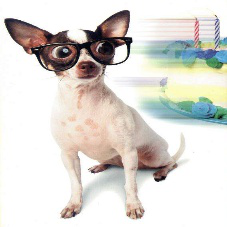

In [19]:
dataset1.data[0]

In [32]:
steps_per_epoch = round(50000/128)
n_steps = 3910*2
final_epoch = round(n_steps/steps_per_epoch)
final_epoch, steps_per_epoch

(20, 391)

In [1]:
epoch = 0
n_steps = 39100+391*2
steps_per_epoch = round(50000/128)
final_epoch = round(n_steps/steps_per_epoch)
step =0
k=0


while(step+1!=n_steps):
    
    if(step%steps_per_epoch==0):
        #print(steps_per_epoch)
        epoch+=1
        #print(epoch,((epoch+1)%10==0),(k<2))
        if ((epoch+1)%10==0) and (k<2):
            print("Hi")
            steps_per_epoch = round(50000*(2**(k+1))/128)
            rest = final_epoch-(epoch+1)
            if(rest==0):
                break
            n_steps = rest*steps_per_epoch+step
            print(n_steps, steps_per_epoch, rest)
            k+=1

    step+=1
print(epoch)

Hi
74980 781 92
Hi
139018 1562 82
100


In [39]:
135894/1562 

87.0

In [28]:
k=0
50000*(2**(k+1))/128

781.25

In [3]:
n_steps = 39100+391*2
n_steps

39882

In [4]:
a=1
b=a
a+=1
a,b

(2, 1)

In [2]:
CORRUPTIONS = [
    'gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur',
    'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog',
    'brightness', 'contrast', 'elastic_transform', 'pixelate',
    'jpeg_compression'
]
for i in CORRUPTIONS:
    print(i)

gaussian_noise
shot_noise
impulse_noise
defocus_blur
glass_blur
motion_blur
zoom_blur
snow
frost
fog
brightness
contrast
elastic_transform
pixelate
jpeg_compression


In [35]:
import math
from torchvision.transforms.functional import InterpolationMode

class PACS_Custom(domainbed.datasets.MultipleDomainDataset):
    CHECKPOINT_FREQ = 300
    N_STEPS = 2500
    ENVIRONMENTS = ['AAP', 'AR', 'C', 'S']
    def __init__(self, root, test_envs, augment, hparams):
        super().__init__()
        root = os.path.join(root, "PACS/Unsplit_data")
        environments = self.ENVIRONMENTS
        environments = sorted(environments) # list of all domains in the dataset, in sorted order
        
        if hparams["backbone"]=="ViTBase":
            MEAN = [0.5, 0.5, 0.5]
            STD = [0.5, 0.5, 0.5]
        else:
            MEAN = [0.485, 0.456, 0.406]
            STD = [0.229, 0.224, 0.225]

        hparams["mean_std"] = [MEAN,STD]

        # train transform
        transform = transforms.Compose([
            transforms.RandomResizedCrop(size=224,
                interpolation=InterpolationMode.BILINEAR,antialias=True),
            transforms.RandomHorizontalFlip(0.5),
            transforms.ToTensor(),
            #transforms.ConvertImageDtype(torch.float),
            transforms.Normalize(
                mean=MEAN, std=STD) if hparams["normalization"] else transforms.Lambda(lambda x: x)
        ])

        augment_transform = transforms.Compose([
            # transforms.Resize((224,224)),
            transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(0.3, 0.3, 0.3, 0.3),
            transforms.RandomGrayscale(),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

        self.datasets = []
        for i, environment in enumerate(environments):

            if augment and (i not in test_envs):
                print('[INFO] Doing Special Data Augmentation for Training')
                env_transform = augment_transform
            elif i not in test_envs:
                print('[INFO] NOT Doing Special Data Augmentation for Training')
                env_transform = transform
            else:
                
                hparams["normalization"]=True
                
                if hparams["normalization"]==True: 
                    print("++++++++ Using Normailztion for val/test data")
                else:
                    print("+++++++++++ Not Using Normailztion for val/test data")

                print('[INFO] Doing ImageNet validation Augmentation')
                if (hparams["backbone"]=="ViTBase") or (hparams["backbone"]=="DeiTBase"):
                    env_transform = transforms.Compose([
                        transforms.Resize(size=math.floor(224/0.9),
                                          interpolation=InterpolationMode.BICUBIC),
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(
                            mean=MEAN, std=STD) if hparams["normalization"] else transforms.Lambda(lambda x: x)
                    ])
                else:
                
                    env_transform = transforms.Compose([
                    transforms.Resize(size=256,
                               interpolation=InterpolationMode.BILINEAR,antialias=True),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(
                        mean=MEAN, std=STD) if hparams["normalization"] else transforms.Lambda(lambda x: x)
                ])
                
                
                
            path = os.path.join(root, environment)
            env_dataset = pacs(root=path, transform=env_transform)
            self.datasets.append(env_dataset)
            
        self.input_shape = (3, 224, 224,)
        self.num_classes = len(self.datasets[-1].classes)

In [36]:
dataset = PACS_Custom("/media/SSD2/Dataset",[1,2,3], False, hparams)

[INFO] NOT Doing Special Data Augmentation for Training
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation


In [1]:
import torch

class _InfiniteSampler(torch.utils.data.Sampler):
    """Wraps another Sampler to yield an infinite stream."""
    def __init__(self, sampler):
        self.sampler = sampler

    def __iter__(self):
        while True:
            for batch in self.sampler:
                yield batch

In [3]:
class InfiniteDataLoader:
    def __init__(self, dataset):
        super().__init__()

        
        sampler = torch.utils.data.RandomSampler(dataset,
                replacement=True)


        batch_sampler = torch.utils.data.BatchSampler(
            sampler,
            batch_size=64,
            drop_last=True)

        self._infinite_iterator = iter(torch.utils.data.DataLoader(
            dataset,
            num_workers=4,
            batch_sampler=_InfiniteSampler(batch_sampler)
        ))

    def __iter__(self):
        while True:
            yield next(self._infinite_iterator)

    def __len__(self):
        raise ValueError

In [ ]:
InfiniteDataLoader(dataset)._infinite_iterator

In [1]:
import domainbed.datasets
import domainbed.networks
from domainbed import algorithms
from domainbed.lib.WideResNet_pytorch.wideresnet import WideResNet
from domainbed.lib.fast_data_loader import InfiniteDataLoader, FastDataLoader
from domainbed.lib import misc
from torchvision import transforms
import torch.nn as nn
import torch
import os

hparams = {"normalization":True, "mean_std":[]}
hparams['loops_adv']=10
hparams['eta']=1.0
hparams['gamma']=1.0
hparams['resnet18'] = True
hparams['empty_fc'] = True
hparams['resnet_dropout'] =0.0
hparams['fixed_featurizer']=False
hparams['scheduler']=False
hparams['nonlinear_classifier']=False
hparams["lr"]=0.1
hparams["lr_max"]=20
hparams['weight_decay']=0.0
hparams['nesterov']=False
hparams['digits']=False
hparams['unfreeze_train_bn']=False
hparams["backbone"] = "ViTBase"
hparams['data_augmentation']=False
hparams['empty_head']=True


dataset = vars(domainbed.datasets)["PACS_Custom"]("/media/SSD2/Dataset",[1,2,3], hparams)


test_transform = transforms.Compose(
                [transforms.ToTensor(),
                transforms.Normalize([0.5] * 3, [0.5] * 3)])

dataset[0].transform = test_transform

# train_loader = torch.utils.data.DataLoader(
#             dataset[0],
#             batch_size=64,
#             shuffle=False,
#             num_workers=4,
#             pin_memory=True)
out,in_  = misc.split_dataset(dataset[0],
                                      int(len(dataset[0]) * 0.2),
                                      misc.seed_hash(1, 0))
train_loaders=[InfiniteDataLoader(in_,None,64,4)]
train_minibatches_iterator = zip(*train_loaders)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"



algorithm_class = algorithms.get_algorithm_class("ERM_ViT")
algorithm = algorithm_class(dataset.input_shape, dataset.num_classes,
                            len(dataset) - len([1]), hparams)
#algorithm.to(device)


/media/SSD2/kavindya/Model/TFS-ViT_Token-level_Feature_Stylization/domainbed/visiontransformer.py:963: UserWarning: Overwriting vit_small_patch16_224 in registry with domainbed.visiontransformer.vit_small_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_small_patch16_224(pretrained=False, **kwargs):
/media/SSD2/kavindya/Model/TFS-ViT_Token-level_Feature_Stylization/domainbed/visiontransformer.py:976: UserWarning: Overwriting vit_base_patch16_224 in registry with domainbed.visiontransformer.vit_base_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_base_patch16_224(pretrained=False, **kwargs):
/media/SSD2/kavindya/Model/TFS-ViT_Token-level_Feature_Stylization/domainbed/visiontransformer.py:988: UserWarning: Overwriting vit_base_patch16_384 in registry with domainbed.visiontransformer.vit_base_patch16_384. This is bec

[INFO] NOT Doing Special Data Augmentation for Training
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
ViTBase Network
full_model_tuning_only


In [8]:
images, labels = [], []
recover_transform = transforms.Compose([
                        Denormalise([0.5] * 3, [0.5] * 3),
                        Clamp(min_val=0, max_val=1)
                        
                        ])

image_denormalise = Denormalise([0.5] * 3, [0.5] * 3)
image_transform = transforms.ToPILImage()

algorithm.eval()
step =0
last_step=10
#for images_train, labels_train in tqdm(train_loader):
while((step+1)!=last_step):
    images_train, labels_train = next(train_loader)
    # wrap the inputs and labels in Variable
    images_train, labels_train = images_train.to(device), labels_train.to(device)
    inputs1, targets1 = algorithm.maximize(images_train, labels_train)
    images += [transforms.ToPILImage()(x) for x in torch.unbind(recover_transform(inputs1), dim=0)]
    labels += torch.unbind(targets1, dim=0)
    #inputs1=inputs1.detach().clone().cpu()
    # for j in range(len(inputs1)):
    #         input_max = image_denormalise(inputs1[j])
    #         input_max = image_transform(input_max.clamp(min=0.0, max=1.0))
    #         images1.append(input_max)
    #         labels.append(labels_train[j].item())
    step+=1
images1 = np.stack(images)
algorithm.train()  
print(len(images), len(labels))

NameError: name 'Denormalise' is not defined

In [4]:
dataset = vars(domainbed.datasets)["PACS_Custom"]("/media/SSD2/Dataset",[1,2,3], hparams)

[INFO] NOT Doing Special Data Augmentation for Training
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation
++++++++ Using Normailztion for val/test data
[INFO] Doing ImageNet validation Augmentation


In [5]:
dataset[0].transform

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [8]:
type(dataset[0])

torchvision.datasets.pacs.PACSDataset

In [9]:
import copy
ss = copy.deepcopy(dataset[0])
xx = copy.deepcopy(dataset[0])

In [17]:
import numpy as np
def split_dataset(dataset, n, seed=0):
    """
    Return a pair of datasets corresponding to a random split of the given
    dataset, with n datapoints in the first dataset and the rest in the last,
    using the given random seed
    """
    assert (n <= len(dataset))
    keys = list(range(len(dataset)))
    np.random.RandomState(seed).shuffle(keys)
    keys_1 = keys[:n]
    keys_2 = keys[n:]
    subset_dataset_1 = copy.deepcopy(dataset)
    subset_dataset_2 = copy.deepcopy(dataset)
    subset_dataset_1.data = [subset_dataset_1.data[k1] for k1 in keys_1]
    subset_dataset_1.targets = [subset_dataset_1.targets[k1] for k1 in keys_1]
    subset_dataset_2.data = [subset_dataset_2.data[k1] for k1 in keys_1]
    subset_dataset_2.targets = [subset_dataset_2.targets[k1] for k1 in keys_1]
    return subset_dataset_1, subset_dataset_2

In [19]:
out, in_t = split_dataset(dataset[0],int(len(dataset[0])*0.2),1)

In [21]:
type(dataset[0])

torchvision.datasets.pacs.PACSDataset

In [20]:
out.transform

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [14]:
len(ss.data), len(xx.targets)

(1670, 1670)

In [2]:
from domainbed.lib.fast_data_loader import InfiniteDataLoader, FastDataLoader
from domainbed.lib import misc

out,in_  = misc.split_dataset(dataset[0],
                                      int(len(dataset[0]) * 0.2),
                                      misc.seed_hash(1, 0))
train_loaders=[InfiniteDataLoader(in_,None,64,4)]
train_minibatches_iterator = zip(*train_loaders)

In [14]:
in_splits = [(in_,1)]

In [6]:
len(in_)

1336

In [7]:
type(in_)

torch.utils.data.dataset.Subset

In [26]:
dataset[0].transform

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [27]:
in_.underlying_dataset.transform

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [28]:
len(in_.underlying_dataset.data)

1670

In [6]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"


In [13]:
from domainbed.scripts.train import ME_ADA_AUGMENT
step =0
last_step=10
#for images_train, labels_train in tqdm(train_loader):
while((step+1)!=last_step):
    # minibatches_device = [(x.to(device), y.to(device))
    #                           for x, y in next(train_minibatches_iterator)]
    # images_train, labels_train = minibatches_device[0][0], minibatches_device[0][1]
    # inputs1, targets1 = algorithm.maximize(images_train, labels_train)
    print()
    print("Hi")
    step+=1
    break

Hi


In [9]:
len(in_)

1336

In [3]:
import domainbed.algorithms

In [3]:
network = domainbed.algorithms.return_backbone_network("ViTBase",10,{'empty_head':True})

ViTBase Network


In [3]:
import timm
network = timm.create_model("vit_base_patch16_224.orig_in21k_ft_in1k",pretrained=True,num_classes=0)

In [3]:
x = next(train_minibatches_iterator)[0]
x = transforms.Resize(224)(x[0])
x.shape


/home/kavindya/anaconda3/envs/ViT_DGbed_2/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([64, 3, 224, 224])

In [4]:
network(x)[-1].shape

NameError: name 'network' is not defined

In [5]:
algorithm.predict(x).shape

torch.Size([64, 768])

In [5]:
k = network(x,True)
k[0][-1].shape, k[-1][-1].shape

(torch.Size([64, 10]), torch.Size([64, 768]))

: 

In [13]:
#k = network.forward_features(x)
len(k)

12

In [10]:
network.forward_head(k).shape

torch.Size([64, 10])

In [12]:
len(network(x,True))

TypeError: forward() takes 2 positional arguments but 3 were given

In [9]:
network(x,True)[0][-1].shape,network(x,True)[-1][-1].shape

x length  12 features length  12
x length  12 features length  12


(torch.Size([64, 10]), torch.Size([64, 384]))

In [59]:
network(x)[-1].shape

torch.Size([10])